# ==============================================================

# Exploratory Data Analysis & Visualizations


# ==============================================================

- Author: Arjun Arora
- Date: 2/17/2021

In this notebook, you will review the following:
1. Reading & Writing Data
2. Initial Exploration
3. Merging and Filtering Data
4. Groupby & Summary Statistics
5. Checking for Missing values
6. Plotting Numerical variables
7. Exploring Distribution of the numerical variables
8. Analyzing Categorical variables
9. Identifying & Removing Outliers
10. Exploring relationship between different variables

# ==============================================================

### 1. Reading & Writing Data

In [4]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [5]:
# load dataset
data = pd.read_csv('Data.csv') #csv
#data = pd.read_excel('Data.xslx', sheet_name='sheet1') #excel

In [20]:
# Write dataset to csv
data.to_csv('SampleData.csv')

In [21]:
# Check shape of each dataset to see if all columns were uploaded
print(data.shape)

(25, 4)


### 2. Inital Exploration

In [50]:
# Let's explore first 5 rows
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [22]:
# check data for duplicates
data.duplicated().sum()

0

In [23]:
# view column names
data.columns

Index(['Country', 'Age', 'Income', 'Purchased'], dtype='object')

In [37]:
# let's access specific rows by index
data[2:7]

,Country,Age,Income,Purchased
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No


In [ ]:
# let's access specific rows by conditions
data.loc[(data['Income'] <= 50000) & (data['Country'] == 'Spain'),]

In [55]:
# check types of uniques
data['Country'].unique()
#data['Country'].nunique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [56]:
# check types of float columns
data.dtypes[data.dtypes == 'float']

Age       float64
Income    float64
dtype: object

In [57]:
# check types of object columns
data.dtypes[data.dtypes == 'object']

Country      object
Purchased    object
dtype: object

In [18]:
# Rename columns within the same dataframe
# data.rename(columns={'Salary':'Income'}, inplace = True)

In [58]:
# Print statements
print('')
print('Total Countries in data are', data['Country'].nunique())
print('')


Total Countries in data are 3



In [53]:
# sort data by values
data.sort_values(by='Salary', ascending=True).head()


,Country,Age,Salary,Purchased
1,Spain,27.0,48000.0,Yes
6,Spain,NaN,52000.0,No
2,Germany,30.0,54000.0,No
5,France,35.0,58000.0,Yes
3,Spain,38.0,61000.0,No


### 3. Merging and Filtering Data


In [ ]:
df_merge = pd.merge(df1, df2, how = 'inner', on = 'msno') # inner join
df_merge = pd.merge(df1, df2, how = 'left', on = 'msno') # left outer
df_merge = pd.merge(df1, df2, how = 'right', on = 'msno') # right outer
df_merge = pd.merge(df1, df2, how = 'outer', on = 'msno') # full outer

In [64]:
# Filter data by specific conditions
df_filtering = data.loc[(data['Income'] > 10000) & (data['Country'] != 'Spain'),['Country','Age','Income']]
df_filtering.head()

,Country,Age,Income
0,France,44.0,72000.0
2,Germany,30.0,54000.0
5,France,35.0,58000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0


In [65]:
# drop columns
data.drop(['Age'], axis = 1, inplace = True)

In [67]:
# select subset of data and change values for another column
data.loc[data['Country'] == 'Spain', 'Age'] = 20000

In [68]:
# if you want to keep index as a new column
data['ID'] = data.index

In [71]:
# creating a new column
data['Age_New'] = data['Age'] + 10

In [72]:
# select certain columns
df_select_columns = data[['Age','Country']]

### 4. Groupby & Summary Statistics

In [73]:
# identify stats for 1 column
data['Age'].mean()

20000.0

In [75]:
# Let's explore the statistics - grouped by country
round(data.groupby('Country')['Age'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
France,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Germany,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spain,6.0,20000.0,0.0,20000.0,20000.0,20000.0,20000.0,20000.0


In [80]:
# Percentage of numerical by group
round(data.groupby('Country')['Income'].sum()*100/data['Income'].sum(),2)

Country
France     57.06
Germany    21.59
Spain      21.35
Name: Income, dtype: float64

In [81]:
# groupby 1 column and get mean for different numerical columns
mean_values = round(pd.DataFrame(data.groupby('Country')['Age','Income'].mean()),2)
mean_values

,Age,Income
Country,,
France,NaN,102092.31
Germany,NaN,100420.00
Spain,20000.0,82783.33


In [82]:
# groupby 2 columns and get all summaries
data.groupby(['Country','Purchased']).mean()

Income      Age    ID  Age_New
Country Purchased                                  
France  No          72000.0      NaN   0.0      NaN
        Yes        104600.0      NaN  14.5      NaN
Germany No         100420.0      NaN  12.8      NaN
        Yes             NaN      NaN   4.0      NaN
Spain   No          89740.0  20000.0  11.4  20010.0
        Yes         48000.0  20000.0   1.0  20010.0

In [83]:
# creating a pivot table
df_pivot = pd.pivot_table(data, values = 'Age', index = ['Country'], columns = ['Purchased'])
df_pivot

Purchased,No,Yes
Country,,
France,NaN,NaN
Germany,NaN,NaN
Spain,20000.0,20000.0


In [84]:
data.corr()

,Income,Age,ID,Age_New
Income,1.000000,NaN,0.966476,NaN
Age,NaN,NaN,NaN,NaN
ID,0.966476,NaN,1.000000,NaN
Age_New,NaN,NaN,NaN,NaN


### 5. Checking for Missing values

In [85]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>1]

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(data[var].isnull().mean(), 3),  ' % missing values')

Age 0.76  % missing values
Age_New 0.76  % missing values


In [ ]:
#check for missing values
data.isnull().sum()

In [ ]:
# fill missing values using median
df.fillna(value = df.median())

# fill missing values using specific term or value
df['Country'].fillna(value = 'Missing')

In [ ]:
#drop missing values
df_dropped = data.dropna()

# ==============================================================

### 6. Plotting Numerical variables

#### Boxplot Analysis

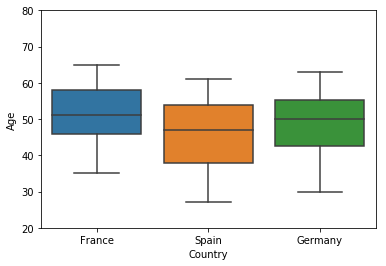

In [65]:
# Let's visualize the distribution by groups
sns.boxplot(x="Country", y="Age", data=data)
plt.ylim(20,80)
plt.show()

#### Line chart

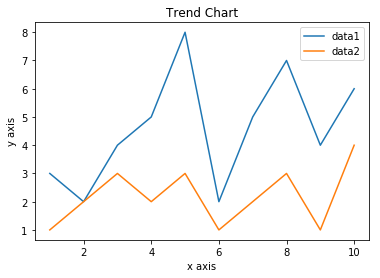

In [66]:
# Create a line chart
fig, ax = plt.subplots()  

# Creating some  dummy data
ax.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [3, 2, 4, 5, 8, 2, 5, 7, 4, 6], label = 'data1')
ax.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 2, 3, 1, 2, 3, 1, 4], label = 'data2') 

# set axis labels
ax.set_xlabel('x axis') 
ax.set_ylabel('y axis')

# set title and legend
ax.set_title("Trend Chart")
ax.legend()

#### Histogram

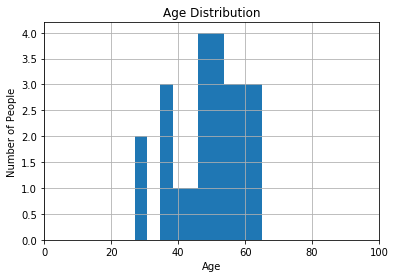

In [74]:
# Create a histogram
data['Age'].hist(bins=10)
plt.ylabel('Number of People')
plt.xlabel('Age')
plt.title('Age Distribution')
plt.xlim(0,100)
plt.show()

### 7. Exploring Distribution of the numerical variables


- Discrete Variables
- Continuous Variables
- Temporal Variables


In [16]:
# list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

# print
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  2


,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN


#### Discrete variables

In [18]:
#  list of discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique())<20 and var not in year_vars+['Id']]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  0


In [19]:
# let's visualise the discrete variables
data[discrete_vars].head()

""
0
1
2
3
4


In [20]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['Target'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Target')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(data, var)

#### Continuous variables

In [23]:
# list of continuous variables
continuous_var = [var for var in num_vars if var not in discrete_vars]

# print count of continuous variables
print('Number of continuous variables: ', len(continuous_var))

# let's visualise the continuous variables
data[continuous_var].head()

Number of continuous variables:  2


,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN


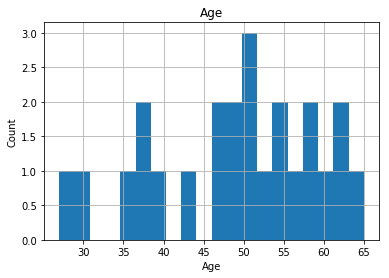

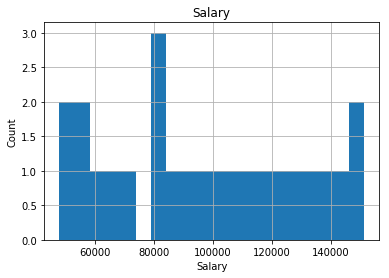

In [25]:
# Let's analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    
    # histogram plot
    df[var].hist(bins=20)
    plt.ylabel('Count')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
# iterate over the variables
for var in continuous_var:
    analyse_continous(data, var)

#### Temporal variables

In [26]:
# list of variables that contain date information
year_cols = [var for var in num_vars if 'Yr' in var or 'Year' in var]

# print columns
year_cols

[]

In [28]:
# let's explore the content of these date variables
for var in year_cols:
    print(var, data[var].unique())
    print()

In [ ]:
# plot time data
data.groupby('Year')['Income'].median().plot()
plt.ylabel('Median Income')
plt.title('Change in Income with the years')

### 8. Analyzing Categorical variables


In [37]:
# Let's evaluate how many different categories are present for the categorical columns
categorical_vars = [var for var in data.columns if data[var].dtypes=='O']

# iterate over categorical columns
for var in categorical_vars:
    print(var,"has", data[var].nunique(), 'categories')

Country has 3 categories
Purchased has 2 categories


### 9. Identifying & Removing Outliers


#### Identifying Outliers

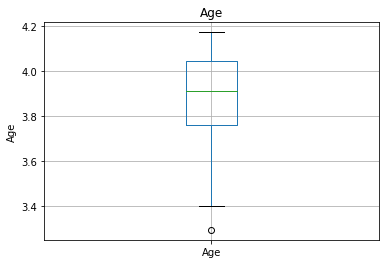

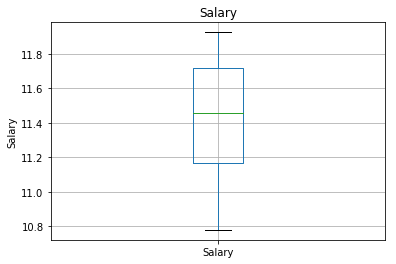

In [30]:
# let's visualise outliers in the continuous variables

def find_outliers(df, var):
    df = df.copy()
    
    # skip negative value columns
    if 0 in data[var].unique():
        pass
    else:
        # log transform
        df[var] = np.log(df[var])
        
        # boxplot
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()

# iterate over the variables
for var in continuous_var:
    find_outliers(data, var)

#### Remove outliers using IQR cutoff

In [31]:
# If variable doesn't follow a normal distribution - use interquartile range to remove outliers

# store price statistics in dataframe
summary = round(data.describe(),2).T

# extract elements accordingly
q75 = summary['75%'].values[0]
q25 = summary['25%'].values[0]

# compute interquartile range
iqr = q75 - q25

# set lower and upper number for cutoff
lower, upper = q25 - (iqr * 1.5), q75 + (iqr * 1.5)

print('Price Percentiles: 25th=%.2f, 75th=%.2f, IQR=%.2f' % (q25, q75, iqr))

Price Percentiles: 25th=43.00, 75th=57.25, IQR=14.25


In [33]:
# edit column to remove outliers from
print('Outliers Based on IQR Cutoff: %d Percent' % round(len(data.loc[(data['Age'] < lower) | (data['Age'] > upper),])*100/data.shape[0],2))

Outliers Based on IQR Cutoff: 0 Percent


In [34]:
# remove outliers from dataset
iqr_data = data.loc[(data['Age'] > lower) & (data['Age'] < upper),]
iqr_data.shape

(24, 4)

### 10. Exploring relationship between different variables

In [41]:
# list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

Number of numerical variables:  2


In [42]:
#  list of discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique())<20 and var not in year_vars+['Id']]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  0


In [43]:
# list of continuous variables
continuous_var = [var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(continuous_var))

Number of continuous variables:  2


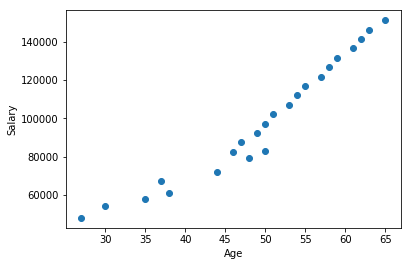

In [51]:
# create scatterplot for 2 continuous variables
plt.scatter(data['Age'], data['Salary'])
plt.ylabel('Salary')
plt.xlabel('Age')
plt.show()

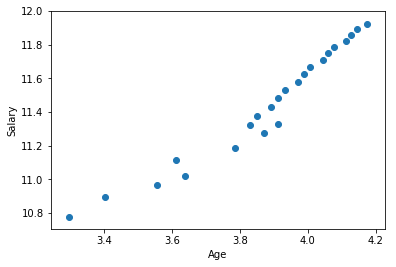

In [52]:
# let's explore the relationship between the target and continuous variables
# Replace target variable name as needed
# this will iterate over all variables

def analyze_relationship(df, var):
    df = df.copy()
    
    # if negative values exist
    if 0 in data[var].unique():
        pass
    else:
        # log transform
        df[var] = np.log(df[var])
        df['Salary'] = np.log(df['Salary'])
        
        # create scatterplot
        plt.scatter(df[var], df['Salary'])
        plt.ylabel('Salary')
        plt.xlabel(var)
        plt.show()

for var in continuous_var:
    if var !='Salary':
        analyze_relationship(data, var)

# ==============================================================
# END
# ==============================================================